In [1]:
import requests

### Adding System Components to a CloudCraft Diagram

CloudCraft automatically generates diagrams from AWS accounts. These diagrams have AWS services automatically labeled but the detailed system composition (e.g., application frameworks, programming languages, database systems) isn't always avaible through the AWS API.

Using the automated system profile we can supplement the automatically generated diagrams with additional information from other sources.

The CloudCraft API allows diagrams to be updated programmatically. The intial proof of concept idea was to include additional icons on the diagram. Unfortunately, CloudCraft does not allow the placement of new images via the API, but we can still add text annotations to the diagram.

In [2]:
system_profile = {'components': [
    {
        'concept_id': 'Q19399674',
        'similarity': 1.0,
        'alias': 'React',
        'mention': 'React',
        'context_sim': 0.35821324586868286,
        'exact_match': 0.0
    },
    {
        'concept_id': 'Q4780272',
        'similarity': 1.0,
        'alias': 'Apollo',
        'mention': 'Apollo',
        'context_sim': 0.5962748527526855,
        'exact_match': 0.0
    },
    {
        'concept_id': 'Q28974885',
        'similarity': 1.0,
        'alias': 'go',
        'mention': 'Go',
        'context_sim': 0.3405699133872986,
        'exact_match': 0.0
    },
    {
        'concept_id': 'Q192490',
        'similarity': 0.9999999403953552,
        'alias': 'Postgres',
        'mention': 'Postgres',
        'context_sim': 0.7339538335800171,
        'exact_match': 0.0
    }
]}

In [3]:
api_key = 'YOUR_KEY'

We can retrieve the current diagram in JSON form with the API.

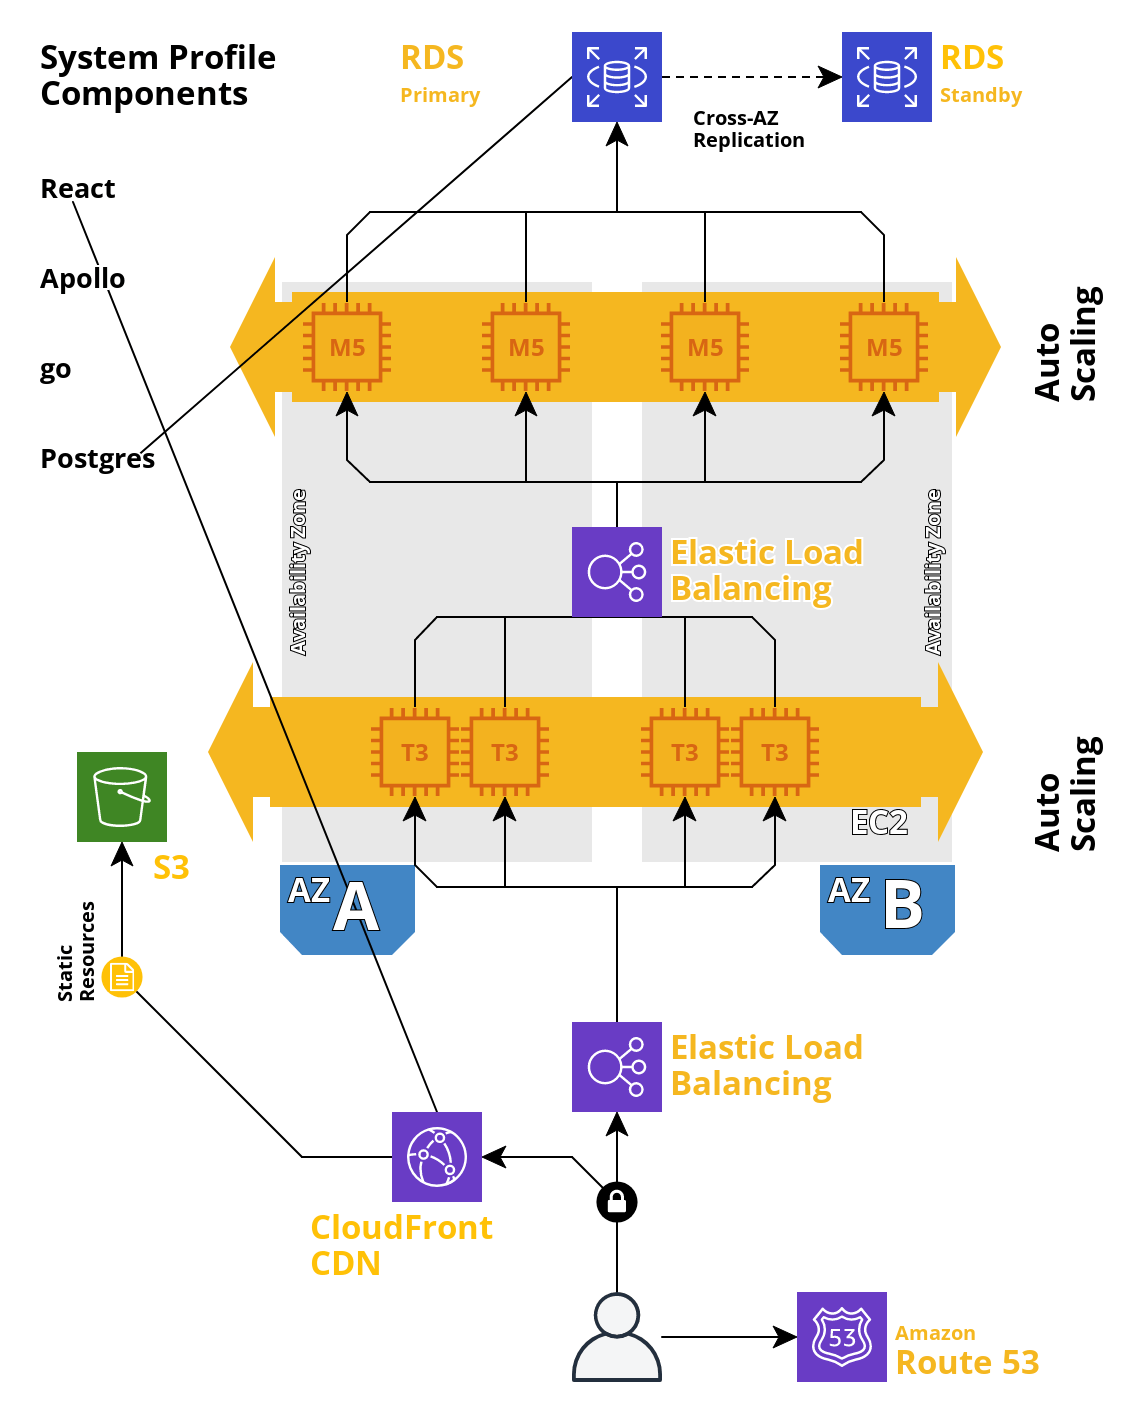

In [4]:
r = requests.get(
    'https://api.us-gov.cloudcraft.co/blueprint/0dae942f-9f85-45a1-b81c-282d9984412a/png',
    headers={'Authorization': f'Bearer {api_key}'}
)
r.content
from PIL import Image
import io
from IPython.display import display
with io.BytesIO(r.content) as f:
    im = Image.open(f)
    display(im)

In [5]:
r = requests.get(
    'https://api.us-gov.cloudcraft.co/blueprint/0dae942f-9f85-45a1-b81c-282d9984412a',
    headers={'Authorization': f'Bearer {api_key}'}
)

In [6]:
current_blueprint = r.json()

In [7]:
current_blueprint

{'id': '0dae942f-9f85-45a1-b81c-282d9984412a',
 'data': {'grid': 'standard',
  'name': 'Web App Reference Architecture',
  'text': [{'id': 'ee2af773-dad5-4757-9409-da7637ce04e0',
    'text': 'Primary',
    'type': 'isotext',
    'color': {'2d': '#f5b720', 'isometric': '#f5b720'},
    'mapPos': [4, 0.5],
    'outline': True,
    'standing': False,
    'textSize': 15,
    'direction': 'down',
    'isometric': 'true'},
   {'id': 'b3bb314f-ce0d-4e39-9f68-f39b622c09ce',
    'text': 'Elastic Load\nBalancing',
    'type': 'isotext',
    'color': {'2d': '#f5b720', 'isometric': '#f5b720'},
    'mapPos': [7, 5.5],
    'outline': True,
    'standing': False,
    'textSize': 25,
    'direction': 'down',
    'isometric': 'true'},
   {'id': '642b8de8-750e-4ac1-92aa-723e2350e0e7',
    'text': 'RDS',
    'type': 'isotext',
    'color': {'2d': '#ffc107', 'isometric': '#ffc107'},
    'mapPos': [10, 0],
    'outline': True,
    'standing': False,
    'textSize': 25,
    'direction': 'down',
    'isometri

Diagram updates with the API apply to complete overwrite so we need to append to the existing `text` fields. 

We will include a sidebar text list with components identified. 

In [81]:
current_blueprint['data']['text'].append({
        'id': f"tech-profile-root",
        'text': "System Profile\nComponents",
        'type': 'isotext',
        'color': {'2d': '#000000', 'isometric': '#000000'},
        'mapPos': [0, 0],
        'outline': True,
        'standing': False,
        'textSize': 25,
        'direction': 'down',
        'isometric': 'true'

})
current_blueprint['data']['text'] += [
    {
        'id': f"tech-profile-{component['concept_id']}",
        'text': component['alias'],
        'type': 'isotext',
        'color': {'2d': '#000000', 'isometric': '#000000'},
        'mapPos': [0, i + 1 + 0.5],
        'outline': True,
        'standing': False,
        'textSize': 20,
        'direction': 'down',
        'isometric': 'true'
    } for i, component in enumerate(system_profile['components'])
]
current_blueprint

{'id': '0dae942f-9f85-45a1-b81c-282d9984412a',
 'data': {'grid': 'standard',
  'name': 'Web App Reference Architecture',
  'text': [{'id': 'ee2af773-dad5-4757-9409-da7637ce04e0',
    'text': 'Primary',
    'type': 'isotext',
    'color': {'2d': '#f5b720', 'isometric': '#f5b720'},
    'mapPos': [4, 0.5],
    'outline': True,
    'standing': False,
    'textSize': 15,
    'direction': 'down',
    'isometric': 'true'},
   {'id': 'b3bb314f-ce0d-4e39-9f68-f39b622c09ce',
    'text': 'Elastic Load\nBalancing',
    'type': 'isotext',
    'color': {'2d': '#f5b720', 'isometric': '#f5b720'},
    'mapPos': [7, 5.5],
    'outline': True,
    'standing': False,
    'textSize': 25,
    'direction': 'down',
    'isometric': 'true'},
   {'id': '642b8de8-750e-4ac1-92aa-723e2350e0e7',
    'text': 'RDS',
    'type': 'isotext',
    'color': {'2d': '#ffc107', 'isometric': '#ffc107'},
    'mapPos': [10, 0],
    'outline': True,
    'standing': False,
    'textSize': 25,
    'direction': 'down',
    'isometri

In [82]:
r = requests.put(
    'https://api.us-gov.cloudcraft.co/blueprint/0dae942f-9f85-45a1-b81c-282d9984412a',
    headers={'Authorization': f'Bearer {api_key}'}, json=current_blueprint
)

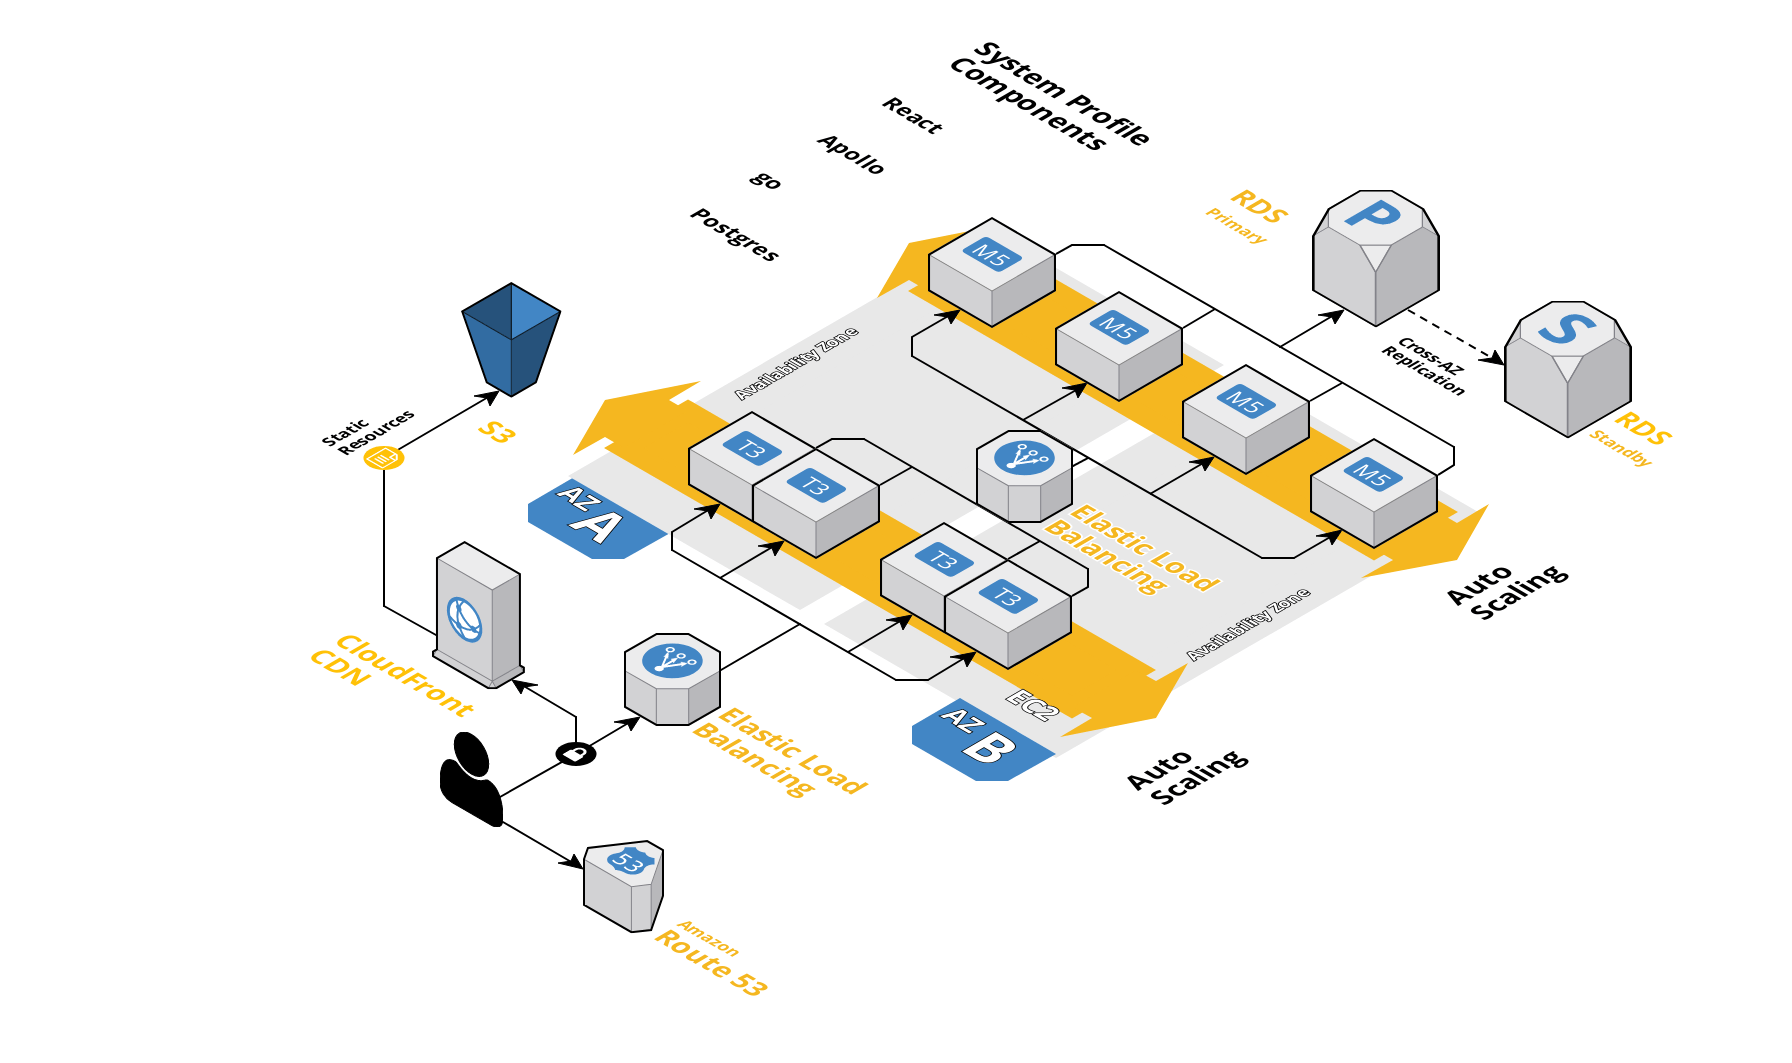

In [83]:
r = requests.get(
    'https://api.us-gov.cloudcraft.co/blueprint/0dae942f-9f85-45a1-b81c-282d9984412a/png',
    headers={'Authorization': f'Bearer {api_key}'}
)
r.content
from PIL import Image
import io
from IPython.display import display
with io.BytesIO(r.content) as f:
    im = Image.open(f)
    display(im)